# 종합실습2 이변량분석(y-숫자) : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### (2) 데이터 로딩

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## 1.숫자형 X --> Y

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### (1) Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

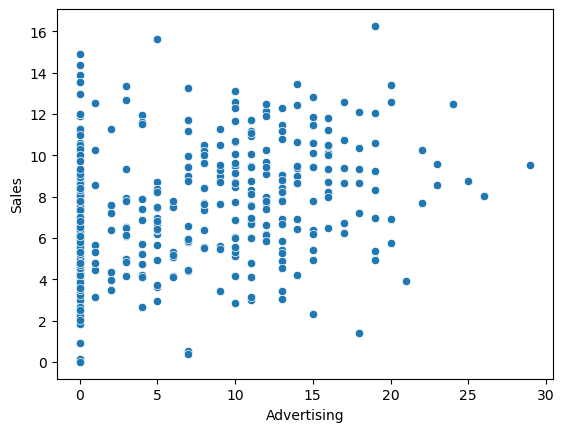

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

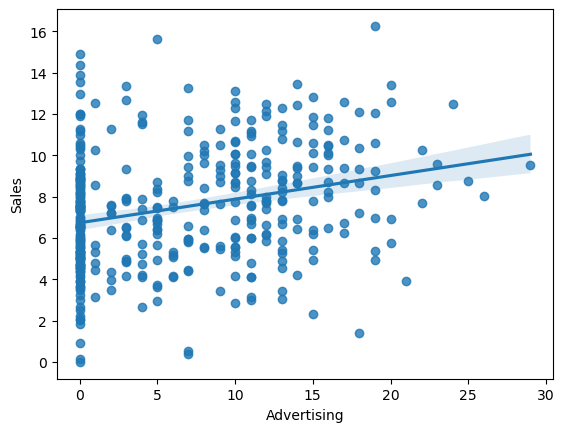

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

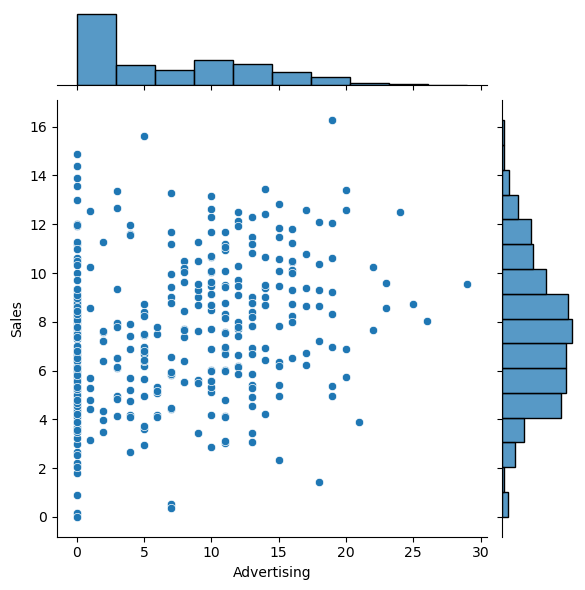

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.377677110302732e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 0을 제외하고 해봐야 할 듯
- 약한 상관관계, but p-value를 봐서 유의미한 값으로 보임
- 

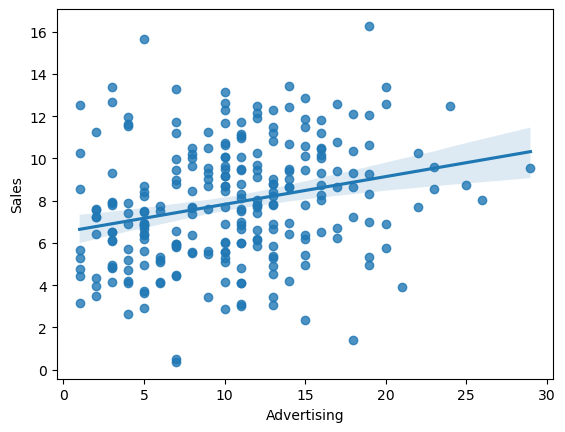

상관계수 : 0.2571829256169392, p-value : 3.11267288308643e-05


In [10]:
temp = data.loc[data['Advertising']!=0]

#sns.jointplot(x=var, y = target, data = temp)
sns.regplot(x=var, y = target, data = temp)
plt.show()
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

### (2) Population -> Sales

1) 시각화 : scatter

In [63]:
target = 'Sales'
var = 'Population'
data = data
def scat(var=var,target=target,data=data):
    plt.figure(figsize=(14,3))
    plt.subplot(1,2,1)
    plt.grid()
    sns.scatterplot(data=data,x=var,y=target)
    plt.subplot(1,2,2)
    plt.grid
    sns.regplot(data=data,x=var,y=target)
    plt.show()
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 {result[0]}, P-VAL {result[1]}')

def joint(var=var,target=target,data=data):
    plt.figure(figsize=(7,3))
    sns.jointplot(data=data,x=var,y=target)
    plt.show()
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 {result[0]}, P-VAL {result[1]}')

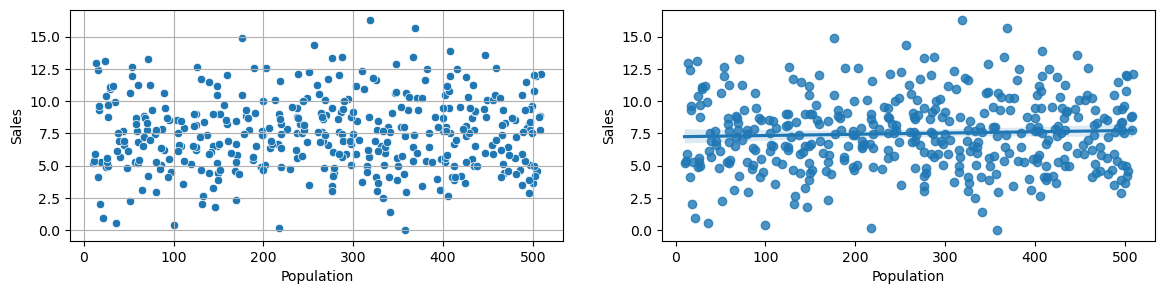

상관계수 0.0504709844720392, P-VAL 0.31398160931903


In [65]:
scat(var,target,data)

<Figure size 700x300 with 0 Axes>

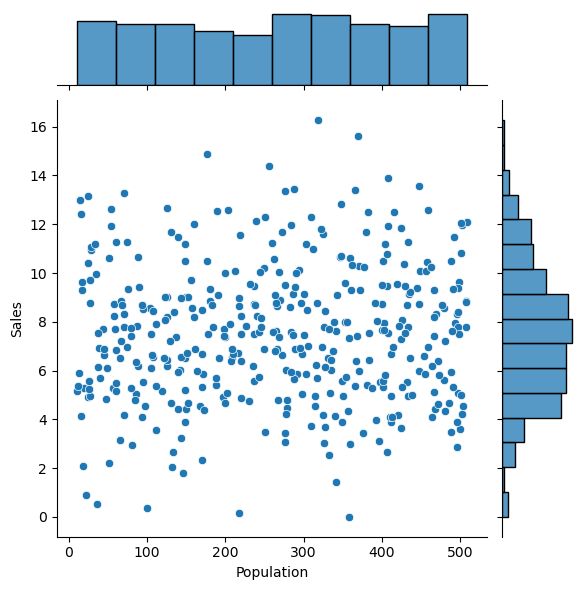

상관계수 0.0504709844720392, P-VAL 0.31398160931903


In [66]:
joint(var,target)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

관계가 아주 미미하다.

### (3) Price -> Sales

1) 시각화 : scatter

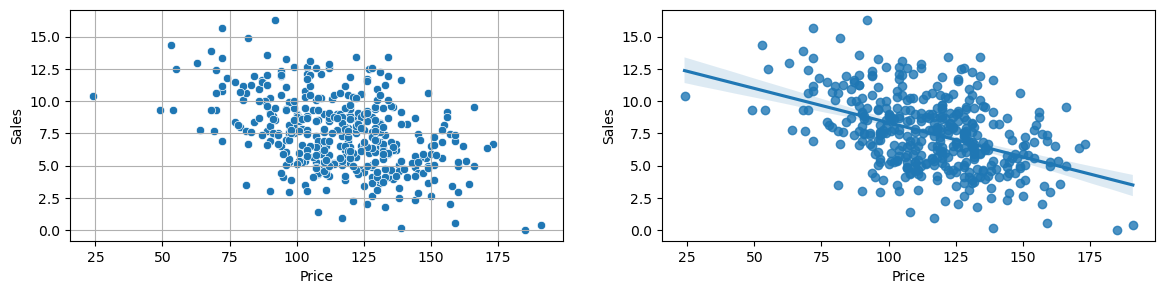

상관계수 -0.4449507278465726, P-VAL 7.61818701191294e-21


In [113]:
var = 'Price'
target = 'Sales'
scat(var,target)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

가격과 판매량은 아주 큰 관계가 있다.

P-val로 봐도 아주 큰 관계가 있음

당연하긴해

###### 다른놈 질문 가격대별 수익율 > Pricing

### (4) Age -> Sales

1) 시각화 : scatter

In [114]:
var = 'Age'
target = 'Sales'

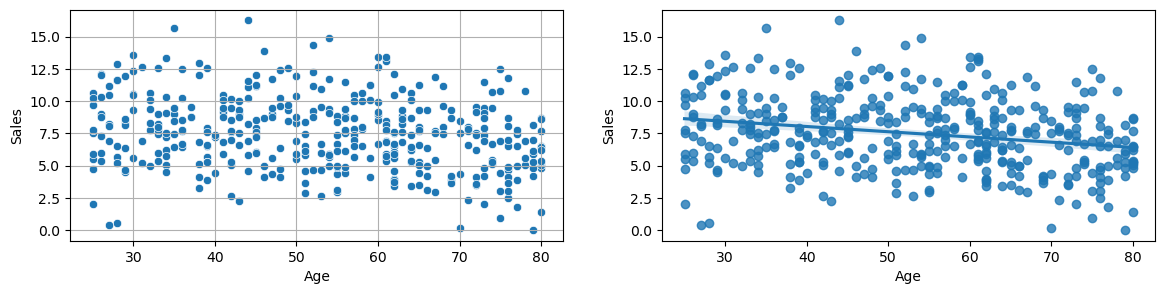

상관계수 -0.2318154396045765, P-VAL 2.7889498393711916e-06


In [115]:
scat(var,target)

<Figure size 700x300 with 0 Axes>

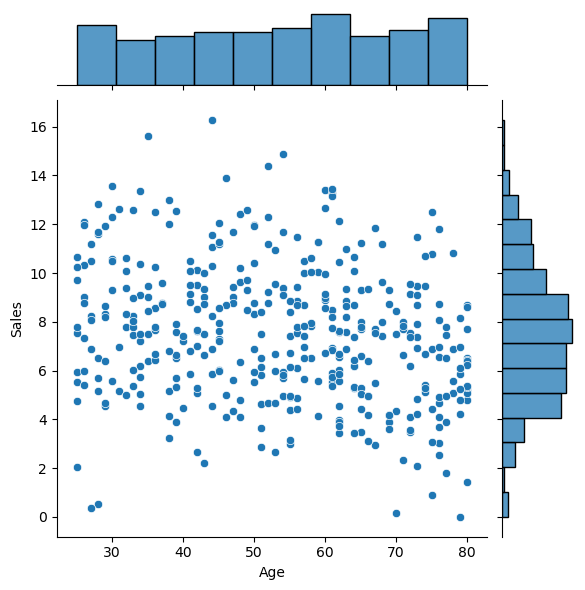

상관계수 -0.2318154396045765, P-VAL 2.7889498393711916e-06


In [116]:
joint(var,target)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

크지는 않지만 관계가 있는 것으로 나옴.

### (5) CompPrice -> Sales

1) 시각화 : scatter

In [70]:
var = 'CompPrice'
target = 'Sales'

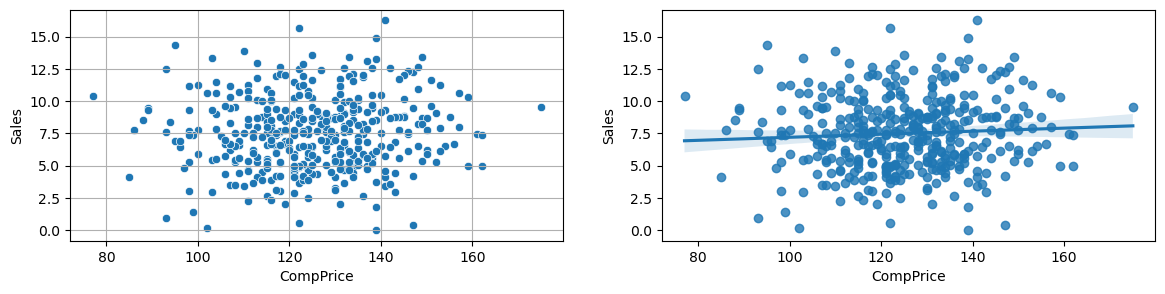

상관계수 0.06407872955062152, P-VAL 0.2009398289418295


In [71]:
scat(var,target)

<Figure size 700x300 with 0 Axes>

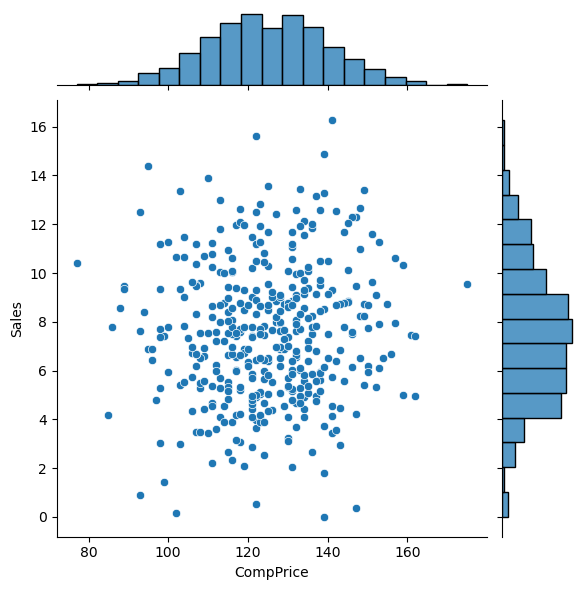

상관계수 0.06407872955062152, P-VAL 0.2009398289418295


In [72]:
joint(var,target)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

하나도 관련이 없다.

가설이 잘못됐을 가능성이 있다.

타사가격이 아니라 가격 경쟁력이 중요하다?

타사가격 - 자사가격 을 가격 경쟁력이라고 한다면?

Feature Engineering -> 비즈니스 도메인과 경험이 중요함

### (6) Income -> Sales

1) 시각화 : scatter

In [76]:
var = 'Income'
target = 'Sales'

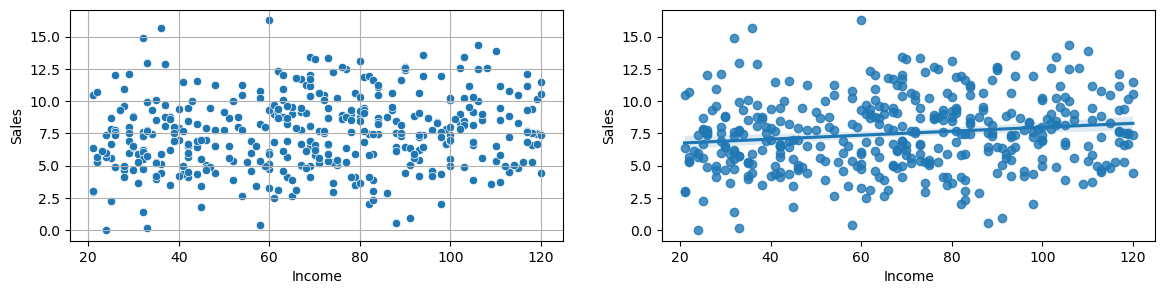

상관계수 0.15195097946754424, P-VAL 0.0023096704539517627


In [77]:
scat(var,target)

<Figure size 700x300 with 0 Axes>

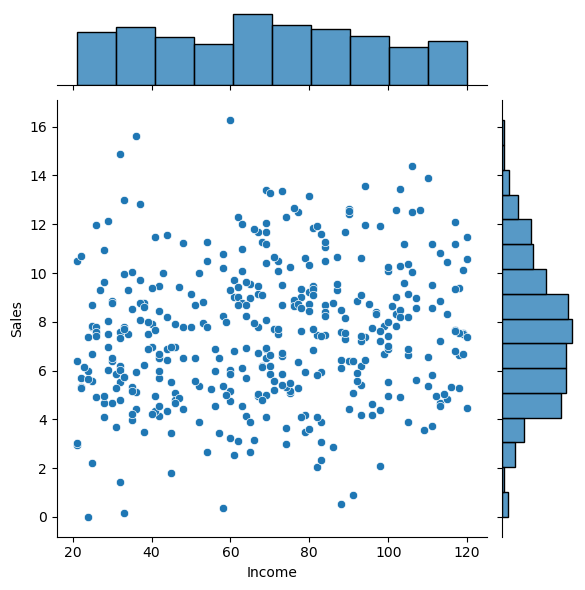

상관계수 0.15195097946754424, P-VAL 0.0023096704539517627


In [78]:
joint(var,target)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

소득이 많다고 아이가 많은 것은 아니다??

## 2.범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### (1) ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

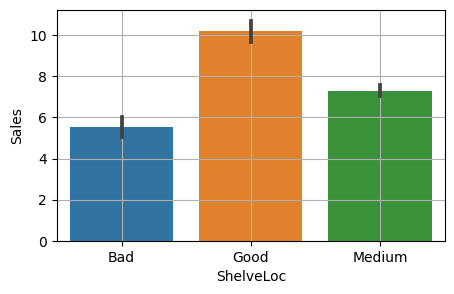

In [121]:
var = 'ShelveLoc'
plt.figure(figsize=(5,3))
sns.barplot(x=var, y=target, data = data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [14]:
#범주 볼 수 있는 코드
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [12]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

s = 2~3이상일 때 관계가 깊다고 했는데 92가 나왓다.
개쩌는거지

### (2) Urban -> Sales

1) 시각화 : 평균비교 barplot

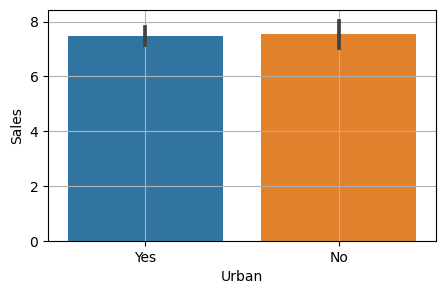

Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)
F_onewayResult(statistic=0.09465065557659712, pvalue=0.7585069603942085)


In [125]:

def bar(var=var,target=target,data=data):
    plt.figure(figsize=(5,3))
    sns.barplot(data=data,x=var,y=target)
    plt.grid()
    plt.show()
    f_func(var,target,data)

def f_func(var,target,data):
    l = []
    for i in data[var].unique():
        d = data.loc[data[var]==i, target]
        l.append(d)
    if len(l) == 2:
        print(f'{spst.ttest_ind(*l)}')
    print(f'{spst.f_oneway(*l)}')

var = 'Urban'
target='Sales'      
bar()


2) 수치화 : t-test, anova

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) US-> Sales

1) 시각화 : 평균비교 barplot

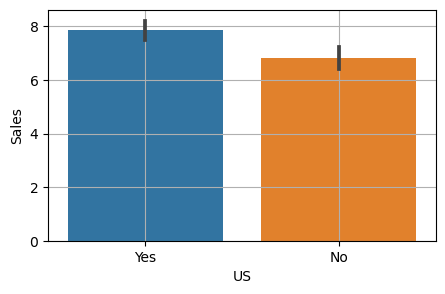

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)
F_onewayResult(statistic=12.886224277474618, pvalue=0.0003723395870148404)


In [126]:
var = 'US'
target = 'Sales'
bar(var,target,data)

2) 수치화 : t-test, anova

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## 3.관계 정리하기

① 강한관계

가격 경쟁력(경쟁사-판매가격), ShelveLoc

② 중간관계

Age, Income, Price, US, Adv

③ 관계없음

Pop, CompPrice,Urban
